In [34]:
from gensim.models import KeyedVectors
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [8]:
subcorpora = ['archaic', 'classical', 'roman', 'christian', 'jewish']

religion_final = ["θεός", "Ζεύς", "εὐσεβής", 'ἱερός']
morality_final = ["ἀγαθός", "ἀρετή", "δίκαιος", "τιμή"]

In [52]:
vectors_seed1_dict = {}
vectors_seed2_dict = {}
for sub in subcorpora:
    vectors_seed1 = KeyedVectors.load("../data/large_data/vectors_{}_seed1.kv".format(sub))
    vectors_seed1_dict[sub] = vectors_seed1
    vectors_seed2 = KeyedVectors.load("../data/large_data/vectors_{}_seed2.kv".format(sub))
    vectors_seed2_dict[sub] = vectors_seed2

In [53]:
vectors_seed1_dict["archaic"]["ἀγαθός"]

array([ 8.00323188e-01, -3.95594478e-01, -1.11931741e+00, -1.38340914e+00,
        3.96503568e-01, -7.71841049e-01,  3.33706886e-01, -1.63025737e+00,
       -1.11710012e+00,  2.90578574e-01, -2.16462359e-01,  1.15401961e-01,
       -6.07439041e-01, -3.46271545e-02,  2.17179269e-01, -8.88727546e-01,
        2.00359643e-01,  8.02888036e-01, -6.13680221e-02, -9.00067270e-01,
       -7.96565473e-01, -6.49207950e-01, -4.01976496e-01,  2.67246455e-01,
        3.58989745e-01,  2.56996840e-01,  5.92952847e-01,  3.07716370e-01,
        6.13297105e-01,  2.18737394e-01, -7.05821455e-01, -2.13801190e-01,
        1.31709471e-01, -1.02382648e+00, -1.17638767e+00, -1.78563714e+00,
        1.14755169e-01,  5.90595379e-02, -8.05350959e-01,  1.20701380e-01,
       -1.15684450e-01,  6.19338751e-01,  4.89407033e-01, -1.73633263e-01,
        1.20414937e+00, -2.78086007e-01,  7.66111553e-01,  3.70103568e-01,
       -4.72691596e-01, -3.08256477e-01, -1.37712464e-01,  3.40660393e-01,
        7.82426536e-01,  

In [72]:
sim_score_list = []
for sub in subcorpora:
    sim_score_dict = {}
    for worda in religion_final:
        for wordb in morality_final:
            sim_score_dict[worda + "+" + wordb] = vectors_seed1_dict[sub].relative_cosine_similarity(worda, wordb, topn=10)
    sim_score_list.append(sim_score_dict)
pd.DataFrame(sim_score_list, index=subcorpora)

,θεός+ἀγαθός,θεός+ἀρετή,θεός+δίκαιος,θεός+τιμή,Ζεύς+ἀγαθός,Ζεύς+ἀρετή,Ζεύς+δίκαιος,Ζεύς+τιμή,εὐσεβής+ἀγαθός,εὐσεβής+ἀρετή,εὐσεβής+δίκαιος,εὐσεβής+τιμή,ἱερός+ἀγαθός,ἱερός+ἀρετή,ἱερός+δίκαιος,ἱερός+τιμή
archaic,0.047957,0.021704,0.026882,0.082926,0.058221,0.025457,0.004725,0.070553,0.017060,0.022009,0.066466,0.034559,-0.010056,-0.012973,0.045119,-0.009470
classical,0.030591,0.032608,0.054864,0.075574,-0.000302,-0.001863,0.010212,0.017295,0.032976,0.024673,0.065484,0.053125,-0.010147,-0.008957,0.014240,0.038965
roman,0.027084,0.037861,0.071486,0.084696,0.016337,0.002496,0.027046,0.040888,0.037580,0.053969,0.074291,0.075063,-0.000267,-0.003068,0.030132,0.048966
christian,0.042299,0.025558,0.046987,0.029295,-0.031304,0.005439,0.003097,0.016024,0.033797,0.031158,0.057756,0.025332,-0.023825,-0.004482,-0.008042,-0.001335
jewish,0.042460,0.010113,0.072471,0.009608,-0.045335,0.016156,0.017282,0.018409,0.066925,0.053826,0.082673,0.024286,-0.018705,0.007515,-0.002700,0.016891


In [66]:
pd.DataFrame(sim_score_list, index=subcorpora)

,θεός+ἀγαθός,θεός+ἀρετή,θεός+δίκαιος,θεός+τιμή,Ζεύς+ἀγαθός,Ζεύς+ἀρετή,Ζεύς+δίκαιος,Ζεύς+τιμή,εὐσεβής+ἀγαθός,εὐσεβής+ἀρετή,εὐσεβής+δίκαιος,εὐσεβής+τιμή,ἱερός+ἀγαθός,ἱερός+ἀρετή,ἱερός+δίκαιος,ἱερός+τιμή
archaic,0.047957,0.021704,0.026882,0.082926,0.058221,0.025457,0.004725,0.070553,0.017060,0.022009,0.066466,0.034559,-0.010056,-0.012973,0.045119,-0.009470
classical,0.030591,0.032608,0.054864,0.075574,-0.000302,-0.001863,0.010212,0.017295,0.032976,0.024673,0.065484,0.053125,-0.010147,-0.008957,0.014240,0.038965
roman,0.027084,0.037861,0.071486,0.084696,0.016337,0.002496,0.027046,0.040888,0.037580,0.053969,0.074291,0.075063,-0.000267,-0.003068,0.030132,0.048966
christian,0.042299,0.025558,0.046987,0.029295,-0.031304,0.005439,0.003097,0.016024,0.033797,0.031158,0.057756,0.025332,-0.023825,-0.004482,-0.008042,-0.001335
jewish,0.042460,0.010113,0.072471,0.009608,-0.045335,0.016156,0.017282,0.018409,0.066925,0.053826,0.082673,0.024286,-0.018705,0.007515,-0.002700,0.016891


In [56]:
for sub in subcorpora:
    for worda in religion_final:
        for wordb in morality_final:
            print(worda, vectors_seed1_dict[sub].similarity(worda, wordb))

θεός 0.17403097
θεός 0.07876221
θεός 0.097551696
θεός 0.30092826
Ζεύς 0.21728946
Ζεύς 0.09500797
Ζεύς 0.017636292
Ζεύς 0.2633161
εὐσεβής 0.079985306
εὐσεβής 0.103185594
εὐσεβής 0.31162217
εὐσεβής 0.1620259
ἱερός -0.034691803
ἱερός -0.044754878
ἱερός 0.15564774
ἱερός -0.032669723
θεός 0.1667719
θεός 0.17776637
θεός 0.2991026
θεός 0.41200814
Ζεύς -0.002035357
Ζεύς -0.012542497
Ζεύς 0.06876
Ζεύς 0.11645254
εὐσεβής 0.2550028
εὐσεβής 0.19079931
εὐσεβής 0.5063953
εὐσεβής 0.41081703
ἱερός -0.0757843
ἱερός -0.066900074
ἱερός 0.10635006
ἱερός 0.29101816
θεός 0.16824935
θεός 0.23520081
θεός 0.44408447
θεός 0.5261422
Ζεύς 0.12666737
Ζεύς 0.0193533
Ζεύς 0.20969284
Ζεύς 0.31701377
εὐσεβής 0.3348479
εὐσεβής 0.4808739
εὐσεβής 0.66194475
εὐσεβής 0.66882294
ἱερός -0.002195485
ἱερός -0.025265938
ἱερός 0.24813189
ἱερός 0.403224
θεός 0.18928817
θεός 0.114372924
θεός 0.21027046
θεός 0.13109587
Ζεύς -0.117721215
Ζεύς 0.020452593
Ζεύς 0.0116455825
Ζεύς 0.060258936
εὐσεβής 0.18611926
εὐσεβής 0.1715864
εὐσεβής

In [64]:
pd.DataFrame(sim_score_list)
for sub in subcorpora:
    for worda in religion_final:
        for wordb in morality_final:
            print(worda, vectors_seed1_dict[sub].relative_cosine_similarity(worda, wordb))

θεός 0.047957041900984654
θεός 0.021704197538999652
θεός 0.02688194320549597
θεός 0.08292563693193612
Ζεύς 0.058220686611633946
Ζεύς 0.025456500433603316
Ζεύς 0.0047254800042318655
Ζεύς 0.07055309378586452
εὐσεβής 0.017060188418655364
εὐσεβής 0.022008613487811014
εὐσεβής 0.06646637073594452
εὐσεβής 0.034558752228180986
ἱερός -0.010056394623865953
ἱερός -0.012973459733908722
ἱερός 0.04511887394038165
ἱερός -0.009470237842391873
θεός 0.030590804350157954
θεός 0.0326075079716572
θεός 0.054864093124275724
θεός 0.07557424254346423
Ζεύς -0.000302276651147244
Ζεύς -0.0018627218679039715
Ζεύς 0.010211742702277421
Ζεύς 0.017294696725058362
εὐσεβής 0.03297556264635612
εὐσεβής 0.024673120094901465
εὐσεβής 0.06548425943066383
εὐσεβής 0.05312460408682711
ἱερός -0.010146998160004606
ἱερός -0.008957460893344232
ἱερός 0.014239542816805445
ἱερός 0.03896533436609367
θεός 0.02708386388749961
θεός 0.03786134396752741
θεός 0.07148629667220756
θεός 0.08469550027188873
Ζεύς 0.016337273799228
Ζεύς 0.002496145

In [59]:
for worda in religion_final:
    for wordb in morality_final:
        for sub in subcorpora:
            topn_mean = np.mean([tup[1] for tup in vectors_seed1_dict[sub].most_similar(worda, topn=100)])
            pair_sim_score = vectors_seed1_dict[sub].similarity(worda, wordb)
            print(sub, worda, wordb, pair_sim_score / topn_mean)

archaic θεός ἀγαθός 0.6766767862873314
classical θεός ἀγαθός 0.37502992985248274
roman θεός ἀγαθός 0.32235061143137295
christian θεός ἀγαθός 0.5666005739995721
jewish θεός ἀγαθός 0.5444213612970703
archaic θεός ἀρετή 0.3062475510887202
classical θεός ἀρετή 0.39975383737210324
roman θεός ἀρετή 0.45062356790158564
christian θεός ἀρετή 0.34235506986015596
jewish θεός ἀρετή 0.12967442496203563
archaic θεός δίκαιος 0.37930585825144675
classical θεός δίκαιος 0.672609871917636
roman θεός δίκαιος 0.8508258473373248
christian θεός δίκαιος 0.6294073547939354
jewish θεός δίκαιος 0.9292285211981567
archaic θεός τιμή 1.1700857950285806
classical θεός τιμή 0.9265072783084097
roman θεός τιμή 1.0080410391786916
christian θεός τιμή 0.3924122478411776
jewish θεός τιμή 0.12319510211938588
archaic Ζεύς ἀγαθός 0.7917220195385251
classical Ζεύς ἀγαθός -0.0034649034188203465
roman Ζεύς ἀγαθός 0.19051420598209115
christian Ζεύς ἀγαθός -0.4061382259831505
jewish Ζεύς ἀγαθός -0.5419321404391325
archaic Ζεύς ἀρε

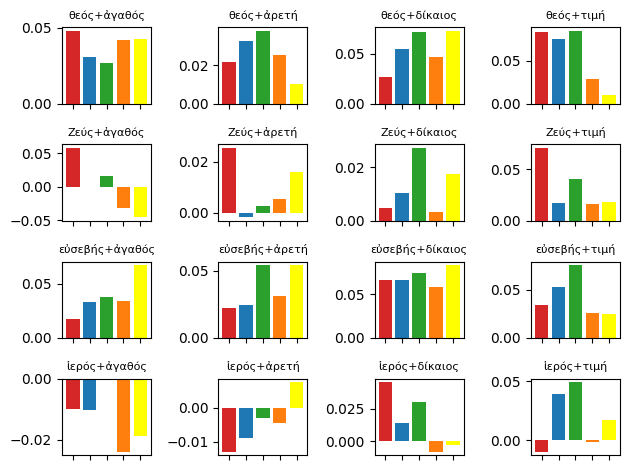

In [77]:
fig, axs = plt.subplots(4,4, tight_layout=True)
bar_labels = subcorpora
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'yellow']

for worda in enumerate(religion_final):
    for wordb in enumerate(morality_final):
        sub_pair_data = []
        for sub in subcorpora:
            #topn_mean = np.mean([tup[1] for tup in vectors_seed1_dict[sub].most_similar(worda, topn=10)])
            #pair_sim_score = vectors_seed1_dict[sub].similarity(worda[1], wordb[1])
            #score = pair_sim_score / topn_mean
            score = vectors_seed1_dict[sub].relative_cosine_similarity(worda[1], wordb[1])
            sub_pair_data.append(score)
        axs[worda[0], wordb[0]].bar(subcorpora, sub_pair_data, label=bar_labels, color=bar_colors)
        axs[worda[0], wordb[0]].set_title(worda[1] + "+" + wordb[1], fontsize=8)
        axs[worda[0], wordb[0]].set_xticklabels([])

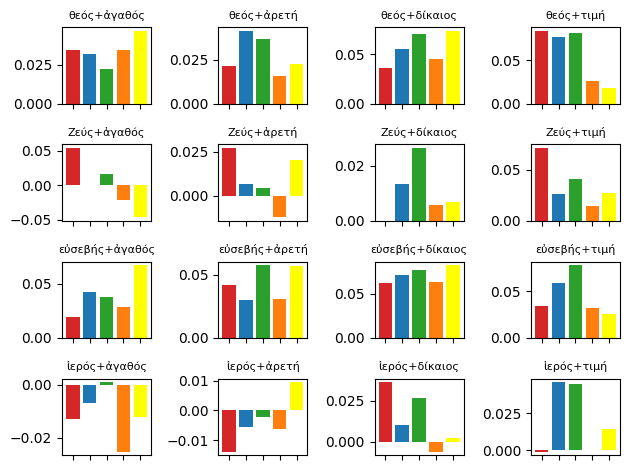

In [78]:
fig, axs = plt.subplots(4,4, tight_layout=True)
bar_labels = subcorpora
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'yellow']

for worda in enumerate(religion_final):
    for wordb in enumerate(morality_final):
        sub_pair_data = []
        for sub in subcorpora:
            #topn_mean = np.mean([tup[1] for tup in vectors_seed1_dict[sub].most_similar(worda, topn=10)])
            #pair_sim_score = vectors_seed1_dict[sub].similarity(worda[1], wordb[1])
            #score = pair_sim_score / topn_mean
            score = vectors_seed2_dict[sub].relative_cosine_similarity(worda[1], wordb[1])
            sub_pair_data.append(score)
        axs[worda[0], wordb[0]].bar(subcorpora, sub_pair_data, label=bar_labels, color=bar_colors)
        axs[worda[0], wordb[0]].set_title(worda[1] + "+" + wordb[1], fontsize=8)
        axs[worda[0], wordb[0]].set_xticklabels([])

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,4, tight_layout=True)

scores = [0.1, 0.2, 0.4, -0.1, 0.2]
bar_labels = subcorpora
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'yellow']

ax.bar(subcorpora, scores, label=bar_labels, color=bar_colors)

ax.set_ylabel('rank')
ax.legend(title='Subcorpora')

plt.show()

In [ ]:
sim_score_list = []
for sub in subcorpora:
    sim_score_diact = {}
    for worda in religion_final:
        for wordb in morality_final:
            sim_score_dict[worda + "+" + wordb] = vectors_seed1_dict[sub].relative_cosine_similarity(worda, wordb)
    sim_score_list.append(sim_score_dict)

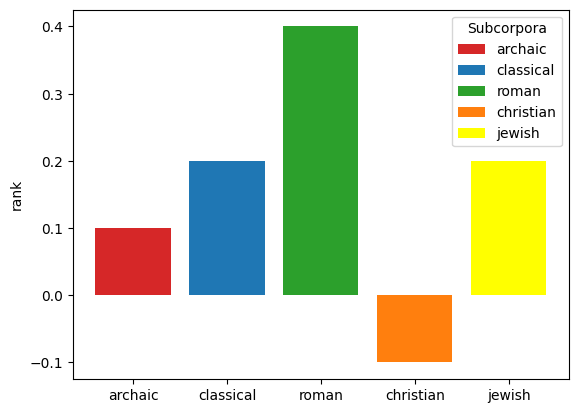

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scores = [0.1, 0.2, 0.4, -0.1, 0.2]
bar_labels = subcorpora
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'yellow']

ax.bar(subcorpora, scores, label=bar_labels, color=bar_colors)

ax.set_ylabel('rank')
ax.legend(title='Subcorpora')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [58]:
vectors_seed1_dict["christian"].most_similar("θεός", topn=100)

[('θεάομαι', 0.5432385802268982),
 ('πατήρ', 0.49382975697517395),
 ('ὕψιστος', 0.4662694036960602),
 ('δικαιόω', 0.45362237095832825),
 ('κτίζω', 0.4469706416130066),
 ('κύριος', 0.4357752799987793),
 ('δοξάζω', 0.4218503534793854),
 ('ἀθετέω', 0.4147200286388397),
 ('πρωτότοκος', 0.4042642116546631),
 ('πατρικός', 0.3945077657699585),
 ('μονογενής', 0.3943803906440735),
 ('θέλημα', 0.3769778311252594),
 ('ἐποπτεύω', 0.3764798641204834),
 ('ἅγιος', 0.3761637210845947),
 ('φιλανθρωπία', 0.37608593702316284),
 ('λατρεύω', 0.3745887279510498),
 ('εὔχομαι', 0.3707728087902069),
 ('προορίζω', 0.3697011470794678),
 ('εὐδοκία', 0.36520135402679443),
 ('κτίστης', 0.3628007769584656),
 ('ἀγαπητός', 0.36084502935409546),
 ('παντοκράτωρ', 0.35922008752822876),
 ('υἱός', 0.3551965355873108),
 ('δωρεά', 0.35504552721977234),
 ('ἀγίων', 0.3535720407962799),
 ('ἀγγέλλω', 0.3506244122982025),
 ('κόλπος', 0.34919849038124084),
 ('δικαίωμα', 0.3484477996826172),
 ('Ἰακώβ', 0.3451511561870575),
 ('σύμμο

In [24]:
vectors_seed2_dict["classical"].similarity("θεός", "ἀγαθός")

0.19117332

In [33]:
cosine_similarity(vectors_seed1_dict["roman"].vectors)

array([[ 1.0000004e+00, -1.3389492e-04,  1.9809005e-01, ...,
         1.3522698e-01,  2.4472563e-01,  3.7294999e-02],
       [-1.3389492e-04,  1.0000004e+00,  4.2049748e-01, ...,
         2.0070477e-01,  2.7415642e-01,  2.6016209e-01],
       [ 1.9809005e-01,  4.2049748e-01,  1.0000001e+00, ...,
         1.8531735e-01,  2.3632790e-01,  1.4061858e-01],
       ...,
       [ 1.3522698e-01,  2.0070477e-01,  1.8531735e-01, ...,
         9.9999970e-01,  8.0351090e-01,  8.6481386e-01],
       [ 2.4472563e-01,  2.7415642e-01,  2.3632790e-01, ...,
         8.0351090e-01,  1.0000001e+00,  7.4933928e-01],
       [ 3.7294999e-02,  2.6016209e-01,  1.4061858e-01, ...,
         8.6481386e-01,  7.4933928e-01,  1.0000001e+00]], dtype=float32)